In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from dtypes import users_beers_dtype
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('../data/users_beers.csv', dtype=users_beers_dtype)
print(df.shape)

(16578208, 6)


In [3]:
beers_df = pd.read_csv('../data/beers.csv')
print(beers_df.shape)

(2533906, 9)


In [4]:
df.isna().sum()

id                     0
user_name              0
score                  0
count                  0
first_checkin_date     0
recent_checkin_date    0
dtype: int64

## Count

In [5]:
df['count'].describe().apply(lambda x: format(x, 'f'))

count    16578208.000000
mean            1.203603
std             2.780806
min             1.000000
25%             1.000000
50%             1.000000
75%             1.000000
max          6083.000000
Name: count, dtype: object

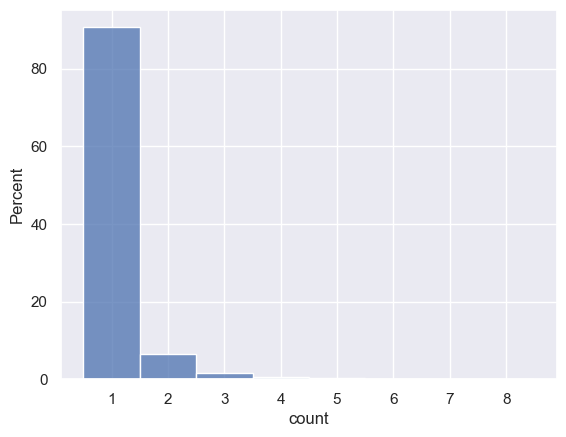

In [6]:
sns.histplot(df['count'], binrange=[1,8], discrete=True, stat='percent');

In [7]:
df['count'].value_counts()

1      14986074
2       1067349
3        256247
4        106453
5         51059
         ...   
325           1
276           1
252           1
177           1
300           1
Name: count, Length: 342, dtype: int64

In [8]:
counts = df['count'].value_counts()
counts.to_csv('name.csv',index=False)

In [9]:
counts.iloc[8:].sum()

48722

In [10]:
df.iloc[df['count'].idxmax()]

id                                                3783
user_name                                    Schlonger
score                                              5.0
count                                             6083
first_checkin_date     Wed, 18 Feb 2015 00:49:34 +0000
recent_checkin_date    Tue, 01 Mar 2022 01:03:24 +0000
Name: 15909035, dtype: object

In [11]:

beers_df[beers_df.id == df.iloc[df['count'].idxmax()].id]

,id,name,style,abv,ibu,created_at,rating_score,rating_count,brewery_id
2029227,3783,Budweiser,Lager - American,5.0,12.0,"Sat, 21 Aug 2010 14:26:35 +0000",2.60989,456590,44.0


## Score

In [12]:
df['score'].describe().apply(lambda x: format(x, 'f'))

count    16578208.000000
mean            3.532370
std             1.058116
min             0.000000
25%             3.250000
50%             3.750000
75%             4.000000
max             5.000000
Name: score, dtype: object

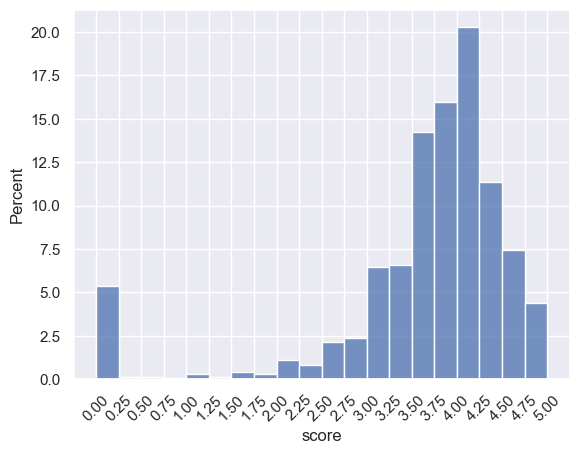

In [13]:
ax = sns.histplot(df.score, stat='percent', binwidth=0.25);
ax.set(xticks=np.arange(0,5.25,0.25))
ax.tick_params(axis='x', rotation=45)
plt.show()

In [14]:
def r(n):
    return round(n*4)/4

score_rounded = r(df.score)

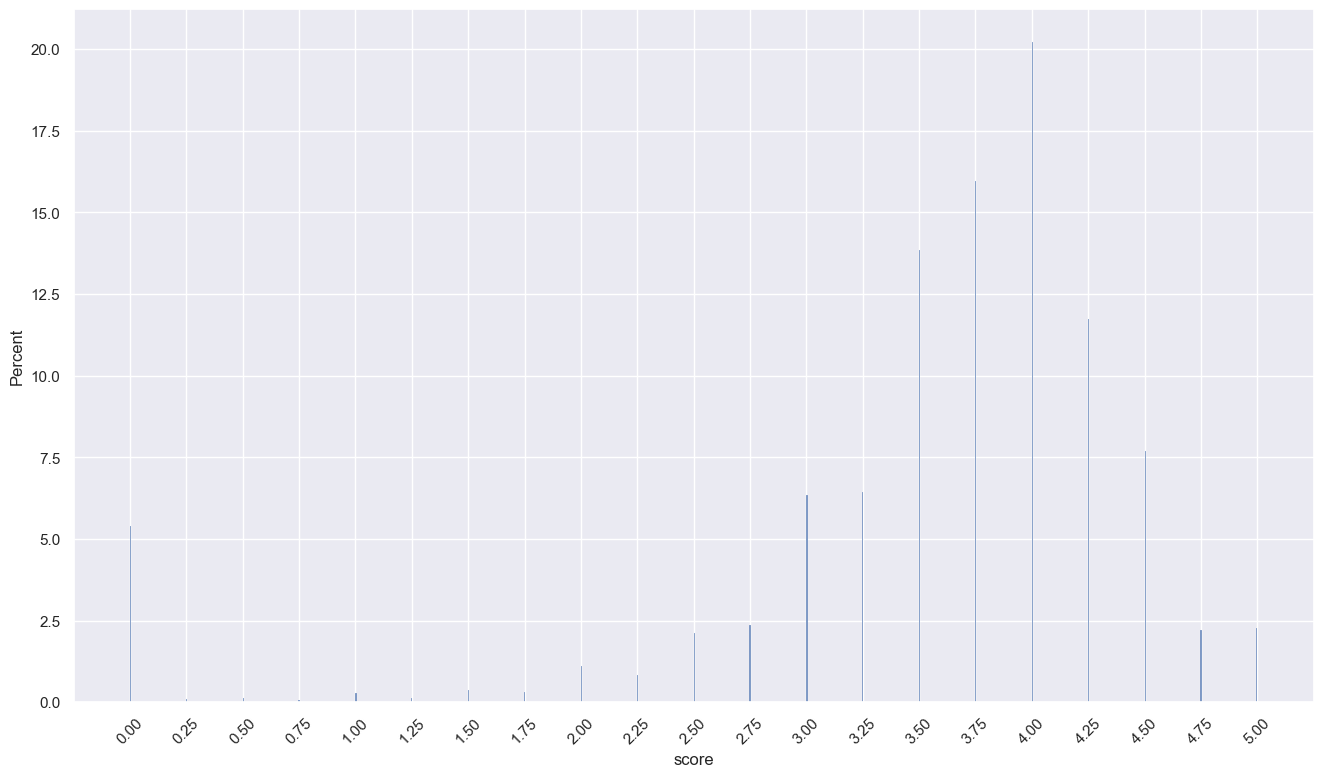

In [15]:
plt.figure(figsize=(16,9))
ax = sns.histplot(score_rounded, stat='percent');
ax.set(xticks=np.arange(0,5.25,0.25))
ax.tick_params(axis='x', rotation=45)
plt.show()

#### Most popular beers which are tried n times

In [16]:
beers_df[beers_df.id.isin(df[df['count'] == 1].id.value_counts().index[:10])]

,id,name,style,abv,ibu,created_at,rating_score,rating_count,brewery_id
2028706,3954,Duchesse de Bourgogne,Sour - Flanders Red Ale,6.2,11.0,"Sat, 21 Aug 2010 14:26:35 +0000",3.67391,232685,305.0
2028897,37936,Pilsner Urquell,Pilsner - Czech,4.4,40.0,"Fri, 18 Mar 2011 00:23:31 +0000",3.36854,359612,1459.0
2028942,14564,Franziskaner Premium Weissbier Naturtrüb,Wheat Beer - Hefeweizen,5.0,12.0,"Mon, 13 Dec 2010 17:11:54 +0000",3.69987,384430,1176.0
2028944,15677,Paulaner Hefe-Weißbier / Hefe-Weizen / Weissbier,Wheat Beer - Hefeweizen,5.5,16.0,"Mon, 20 Dec 2010 00:24:57 +0000",3.67186,395426,972.0
2028988,5940,Leffe Blonde / Blond,Belgian Blonde,6.6,20.0,"Fri, 01 Oct 2010 14:41:56 +0000",3.58555,467140,5.0
2029033,1441008,Elvis Juice,IPA - American,6.5,40.0,"Wed, 24 Feb 2016 18:32:43 +0000",3.71276,349592,241.0
2029038,3839,Belgian White,Wheat Beer - Witbier / Blanche,5.4,9.0,"Sat, 21 Aug 2010 14:26:35 +0000",3.49994,551628,127804.0
2029091,6422,Hoegaarden Wit / Blanche,Wheat Beer - Witbier / Blanche,4.9,15.0,"Sun, 10 Oct 2010 13:14:40 +0000",3.55581,423644,302.0
2029163,5848,Corona Extra,Lager - Mexican,4.5,18.0,"Sat, 21 Aug 2010 13:24:16 +0000",3.11338,591943,618.0
2029313,5702,Punk IPA,IPA - American,5.2,35.0,"Sat, 21 Aug 2010 14:26:35 +0000",3.72180,490264,241.0


## Зависимость популярности стилей от количества чекинов пользователей

In [ ]:
N_TOP_STYLES = 10

In [ ]:
N_MANY_STYLES = 100
def favorite_styles_of_user_group(interval, n_top_styles=N_MANY_STYLES):
	min_checkins = interval[0]
	max_checkins = interval[1]
	slice_of_user_group = df[df.user_name.isin(users_df[(users_df.total_beers >= min_checkins) & (users_df.total_beers < max_checkins)].user_name)]
	counts = slice_of_user_group['style'].value_counts()[:n_top_styles]
	total_checkins = slice_of_user_group.shape[0]
	for index in counts.index:
			counts[index] = (counts[index] / total_checkins * 100).round(2)
	return counts

In [ ]:
# intervals = [[0, 100], [100, 500], [500, 1000], [1000, 5000], [5000, 100000]]
intervals = [[0, 300], [300, 1000], [1000, 2500], [2500, 5000], [5000, 100000]]

In [ ]:
# create top_unique_styles_index – index for common order among intervals
N_MANY_STYLES = 100

one = favorite_styles_of_user_group(intervals[0])
two = favorite_styles_of_user_group(intervals[1])
three = favorite_styles_of_user_group(intervals[2])
four = favorite_styles_of_user_group(intervals[3])
five = favorite_styles_of_user_group(intervals[4])

top_unique_styles_index = pd.concat([one, two, three, four, five]).index.drop_duplicates()

one = one.reindex(top_unique_styles_index)
two = two.reindex(top_unique_styles_index)
three = three.reindex(top_unique_styles_index)
four = four.reindex(top_unique_styles_index)
five = five.reindex(top_unique_styles_index)

In [ ]:
N_TOP_STYLES = 10
def create_data(frames):
    return [frame.values[:N_TOP_STYLES] for frame in frames]
data = create_data([one, two, three, four, five])
# index = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
index = ['0-300', '300-1000', '1000-2500', '2500-5000', '5000+']
columns = top_unique_styles_index[:N_TOP_STYLES]
lineplot_data = pd.DataFrame(data, index, columns)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=lineplot_data);
plt.xlabel('Total checkins')
plt.ylabel('Percent of checked in beers')
plt.legend(loc='upper right')

plt.show()